# ARIMA

In [1]:
!pip install statsmodels

<ipython-input-7-de8ac3938a7d>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -197.350
Method:                       css-mle   S.D. of innovations             66.436
Date:                Fri, 31 Dec 2021   AIC                            408.699
Time:                        14:13:35   BIC                            419.587
Sample:                    02-01-1991   HQIC                           412.458
                         - 12-01-1993                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4256      3.774      3.292      0.001       5.028      19.823
ar.L1.D.Sales    -1.0850      0.188     -5.764      0.000      -1.454      -0.716
ar.L2.D.Sales    -0.6688      0.283     

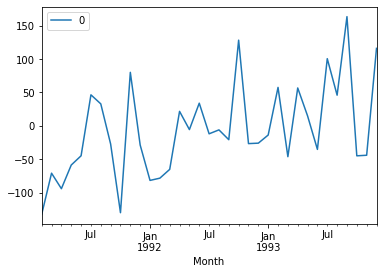

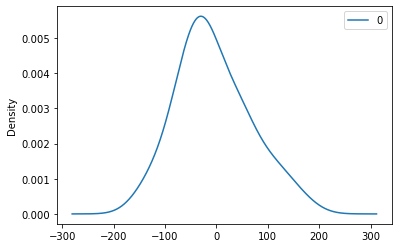

                0
count   35.000000
mean    -5.569258
std     70.272666
min   -132.525607
25%    -45.563781
50%    -20.763496
75%     39.933210
max    163.552148


In [7]:
# ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv # 파이썬 판다스 라이브러리의 read_csv() 메서드를 사용해서 외부 text, csv파일을 불러와 dataframe로 저장
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x): # 시간을 표현하는 함수정의
    return datetime.strptime('199'+x, '%Y-%m') # strptime은 날짜와 시간정보를 문자열로 바꿔주는 메소드
series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
model = ARIMA(series, order=(53,1,0)) # ARIMA함수 호출
model_fit = model.fit(disp=0)  # 모형을 적용할 때마다 많은 디버그 정보가 제공되는데 disp인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary()) # 모델에 대한 정보 표시
residuals = DataFrame(model_fit.resid) # DataFrame에 모델에 대한 오차 정보를 residuals에 저장
residuals.plot() # residuals정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

<ipython-input-8-478820a07e8b>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA

predicted=354.377733,expected=346.300000
predicted=288.627364,expected=329.700000
predicted=382.817971,expected=445.400000
predicted=339.543806,expected=325.900000
predicted=392.897344,expected=449.300000
predicted=354.487994,expected=411.300000
predicted=452.200111,expected=417.400000
predicted=406.806117,expected=545.500000
predicted=430.162100,expected=477.600000
predicted=492.745329,expected=687.000000
predicted=493.604811,expected=435.300000
predicted=657.397190,expected=587.300000
predicted=522.091061,expected=676.900000
Test MSE : 8074.991


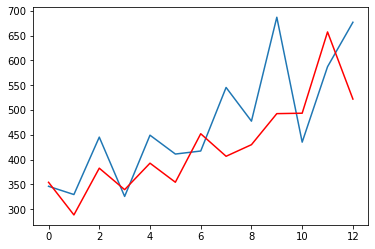

In [8]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')
series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X=series.values
X=np.nan_to_num(X)
size=int(len(X)*0.66)
train,test=X[0:size],X[size:len(X)] # train,test로 데이터셋 분리
history=[x for x in train]
predictions=list()
for t in range(len(test)): # test데이터셋의 길이(13번)만큼 반복수행
    model=ARIMA(history,order=(5,1,0)) # ARIMA 함수 호출
    model_fit=model.fit(disp=0)
    output=model_fit.forecast() # forecast를 사용하여 예측 수행
    yhat=output[0] # 모델 출력 결과를 yhat에 저장
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f,expected=%f'%(yhat,obs)) # 모델 실행결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력
error=mean_squared_error(test,predictions) # 손실 함수로 평균 제곱 오차 적용
print('Test MSE : %.3f'%error)
pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()

# 순환신경망(RNN)

In [20]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2' # 케라스에서 발생하는 경고메시지 제거
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [25]:
# 값 초기화
tf.random.set_seed(22)
np.random.seed(22)
assert tf.__version__.startswith('2.') # 텐서플로 버전이 2인것을 확인

batch_size=128
total_words=10000
max_review_len=80
embedding_len=100

In [26]:
# 데이터셋 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words) # 1

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len) # 2
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)) # 3
train_data = train_data.shuffle(10000).batch(batch_size, drop_remainder=True) # 4
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)) # x_test,y_test 데이터에 대한 넘파일 배열을 바로 Dataset로 변환
test_data = test_data.batch(batch_size, drop_remainder=True) # 테스트 데이터셋을 변환
print('x_train_shape:', x_train.shape, tf.reduce_max(y_train), tf.reduce_min(y_train))
print('x_test_shape:', x_test.shape)

sample = next(iter(test_data))
print(sample[0].shape)

x_train_shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test_shape: (25000, 80)
(128, 80)


- 1 : imdb.load_data()를 사용하여 IMDB 데이터셋을 내려받음, num_words는 데이터에서 등장 빈도 순위를 몇번째로 해당하는 단어까지 사용할지 의미, 10000이라면 빈도 순위가 1~10000에 해당하는 단어만 사용
- 2 : 전체 훈련 데이터셋에서 각 샘플의 길이는 서로 다를 수 있고, 각 문서 혹은 각 문장은 단어수가 각각 제각각임. 모델의 입력으로 사용하려면 모든 샘플 길이를 동일하게 맞추어야 하는데 이를 자연어처리에서는 패딩(padding)이라 부름, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줌. 케라스에서는 pad_sequence()를 사용함 pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움
    - 첫번째 인자 : 패딩을 진행할 데이터
    - maxlen : 모든 데이터에 대해 정규화할 길이
- 3 : 넘파이 배열을 Dataset로 변환, 이때 주의해야 할 것은 변환하려는 전체 데이터를 메모리로 로딩해야 하기 때문에, 큰 용량의 메모리가 필요 이 문제를 해결하려면 Dataset의 from_generator()를 사용하는 것, 이를 사용하면 필요할때만 파이썬 generator을 통해 가져옴
- 4 : 3에서 만들어준 데이터셋 변형
    - shuffle() : 데이터셋을 임의로 섞어줌, 여기서 사용되는 것이 buffer_size임. 데이터를 메모리로 불러와서 섞는 과정이 진행되기 때문에, buffer_size를 지정. 버퍼에서 임의로 샘플을 봅고, 뽑은 샘플은 다른 샘플로 대체, 데이터셋에서 완벽하게 섞이기 위해서는 데이터셋의 크기에 비해 크거나 같은 버퍼로 지정되어야 함
    - batch : 데이터셋의 항목들을 하나의 배치로 묶어줌, batch_size는 몇개의 샘플로 가중치를 갱신할 지 결정
    - drop_remainder : 마지막 배치 크기를 무시하고 지정한 배치 크기를 사용할 수 있음
    
결과로는 훈련과 검증 용도의 데이터셋에 대한 형태를 출력한 것임

In [29]:
# RNN셀을 이용한 네트워크 생성
class RNN_Build(tf.keras.Model): # 1
    def __init__(self, units): # 2
        super(RNN_Build, self).__init__() # 3
        
        self.state0 = [tf.zeros([batch_size, units])] # 4
        self.state1 = [tf.zeros([batch_size, units])]
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len) # 5

        self.RNNCell0 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2) # 6
        self.RNNCell1 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.outlayer = tf.keras.layers.Dense(1)
        
    def call(self, inputs, training=None): # 2'
        x = inputs
        x = self.embedding(x)
        state0 = self.state0  
        state1 = self.state1
        for word in tf.unstack(x, axis=1): # 7
            out0, state0 = self.RNNCell0(word, state0, training) # out0,state0 각각에 self.RNNCell0에서 받아온 값을 저장
            out1, state1 = self.RNNCell1(out0, state1, training) # out1,state1 각각에 self.RNNCell1에서 받아온 값을 저장
        x = self.outlayer(out1) # 출력층 out1을 적용한 후 그 값을 x 변수에 젖아
        prob = tf.sigmoid(x) # 마지막으로 x에 시그모이드 활성화 함수를 적용하여 prob에 저장
        return prob # prob값을 변환

- 1 : 객체 지향 프로그램을 파이썬에서 구현한 것, 즉 구조를 설계한 후 재사용성을 고려하거나, 코드의 반복을 최소화하는데 사용
- 2, 2' : __init__ 는 클래스 인스턴스를 생성할 때 초기화하는 부분. 이때 init는 객체가 생성될 때 호출되며, call은 인스턴스가 생성될때 사용
- 3 : 기반 클래서의 __init__ 메서드를 호출,  super()뒤에 .을 붙여 메서드를 호출하는 방식
- 4 : self는 자신의 인스턴스를 의미, tf.zeros를 사용하여 0값으로 채워진 텐서를 생성해 state0에 저장
- 5 : 케라스는 텍스트 데이터에 대해 워드 임베딩을 수행하는 임베딩층을 제공, 임베딩층을 사용하려면 각 입력이 모두 정수로 인코딩되어 있어야 함. 즉 각가의 입력은 정수로 변환된 상태에서 임베딩 층을 구성
    - total_words(첫번째 인자) : 텍스트 데이터의 전체 단어 집합 크기, 예를 들어 데이터셋의 단어들이 0에서 20000까지 인코딩되어있다면 단어 집합의 크기는 20001이 되어야 함
    - embedding_len(두번째 인자) : 임베딩이 되구 난 후의 단어의 차원, 이 값을 256으로 설정한다면, 모든 단어의 차원이 256이 됨
    - input_length : 입력 데이터의 길이, 각 데이터 길이가 단어 500개로 구성되어 있다면 이 값은 500이 됨
- 6 : SimpleRNN의 셀 클래스를 의미
    - units : 출력 공간의 차원
    - dropout : 0과 1사이의 부동소수점, 입력중에서 삭제할 유닛의 비율
- 7 : unstack() - 중복된 값이 있을 때 사용하면 유용, 즉 다음 그림과 같이 그룹으로 묶은 데이터를 행렬 형태로 전환하여 연산시 사용

In [30]:
# 모델 훈련
import time
units = 64
epochs = 4
t0 = time.time() # 모형의 실행시간을 위해 시간을 10에 저장

model = RNN_Build(units) 
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False) # 1
     
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2) # 2

Epoch 1/4
195/195 [==============================] - 8s 23ms/step - loss: 0.4800 - accuracy: 0.7577
Epoch 2/4
195/195 [==============================] - 7s 36ms/step - loss: 0.3009 - accuracy: 0.8752 - val_loss: 0.3898 - val_accuracy: 0.8327
Epoch 3/4
195/195 [==============================] - 5s 23ms/step - loss: 0.2084 - accuracy: 0.9208
Epoch 4/4
195/195 [==============================] - 6s 32ms/step - loss: 0.1023 - accuracy: 0.9627 - val_loss: 0.5760 - val_accuracy: 0.7990


- 1 : model.compile()에서는 다양한 하이퍼파라미터 정의
    - optimizer : 옵티마이저 설정, 여기서는 0.001의 학습률을 적용한 Adam 사용
    - loss : 훈련 과정에서 사용할 손실 함수를 설정, 여기서는 이진분류인 BinaryCrossentropy 사용
    - metrics :  훈련을 모니터링하기 위한 지표 선택, 여기서는 정확도 사용
    - experimental_run_tf_function : 모델을 인스턴스하는 기능을 제공, 실제로 experimental_run_tf_function이 호출되어야 컴파일 실행
- 2 : model.fit()은 모델을 학습하는데 사용
    - train_data(첫번째 인자) : 입력 데이터
    - epochs : 학습 반복 횟수
    - validation_data : 검증 데이터
    - validation_freq " 에포크마다 무조건 검증 데이터셋에 대한 계산을 수행하지 않고 적절한 간격을 두고 계산하는 것 ex) 1,2,10이면 1,2,10번재 에포크 검정

In [32]:
# 모델 평가
print('훈련 데이터셋 평가')
(loss,accuracy)=model.evaluate(train_data,verbose=0) # 1
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가
loss=0.0464, accuracy: 99.0224%
테스트 데이터셋 평가...
loss=0.5760, accuracy: 79.8998%
시간: 414.3982832431793


- model_evaluate()는 모델을 평가하기 위한 함수로 파라미터 의미는 다음과 같음
    - train_data : ;훈련 데이터
    - verbose : 얼마나 자세하게 정보를 표시할지

# RNN층 계층 구현

In [35]:
# 네트워크 (신경망) 구축
class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.rnn = tf.keras.Sequential([
            tf.keras.layers.SimpleRNN(units, dropout=0.5, return_sequences=True), # 1
            tf.keras.layers.SimpleRNN(units, dropout=0.5)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)

        return prob

- 1 : SimpleRNN 함수를 사용하여 은닉 노드가 다수인 개인 RNN셀을 여러개 구축할 수 있음
    - units : 네트워크의 층 수
    - dropout : 전체 노드 중 20%의 값을 0으로 설정하여 사용하지 않겠음을 의미
    - return_sequences : 마지막 출력 또는 전체 순서를 반환하는 것, 이때 주의해야 할 점은 return_sequences=True는 출력 순서 중 마지막 값만 출력하는 것이 아니라 전체 순서열을 3차원 텐서 형태로 출력
    
    
- SimpleRNNCell은 SimpleRNN과 코드 구현이 거의 비슷하지만, for문을 사용하여 반복수행한다는 점에서 차이가 있음

In [36]:
# 모델 훈련
import time
units=64
epochs=4
t0=time.time()

model=RNN_Build(units)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.losses.BinaryCrossentropy(),
             metrics=['accuracy'],
             experimental_run_tf_function=False)

model.fit(train_data,epochs=epochs,validation_data=test_data,validation_freq=2)

Epoch 1/4
195/195 [==============================] - 11s 52ms/step - loss: 0.5421 - accuracy: 0.7082
Epoch 2/4
195/195 [==============================] - 14s 70ms/step - loss: 0.3567 - accuracy: 0.8498 - val_loss: 0.3987 - val_accuracy: 0.8295
Epoch 3/4
195/195 [==============================] - 11s 57ms/step - loss: 0.2940 - accuracy: 0.8837
Epoch 4/4
195/195 [==============================] - 14s 72ms/step - loss: 0.2396 - accuracy: 0.9061 - val_loss: 0.4923 - val_accuracy: 0.8277


In [37]:
# 모델 평가
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1269, accuracy: 95.2604%
테스트 데이터셋 평가...
loss=0.4923, accuracy: 82.7724%
시간: 55.77049374580383


SimpleRNNCell보다 훈련 데이터에 대한 정확도가 낮아졌고, 테스트 데이터셋에 대한 정확도는 높아졌으나, 수행시간이 길어짐

# LSTM

In [42]:
# 네트워크 생성
class LSTM_Build(tf.keras.Model):
    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.LSTMCell(units, dropout=0.5) # 1
        self.RNNCell1 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        state0 = self.state0 # 초기상태 0으로 설정
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    

            out0, state0 = self.RNNCell0(word, state0, training) # train 매개변수 추가
            out1, state1 = self.RNNCell1(out0, state1, training)

        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

- 1 : LSTM 셀 클래스를 의미
    - units(첫번째 인자) : 메모리 셀의 개수
    - dropout : 전체 가중치 중 50% 값을 0으로 설정하여 사용하지 않겠다는 의미

In [43]:
# 모델 훈련
import time
units=64
epochs=4
t0=time.time()

model=LSTM_Build(units)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.losses.BinaryCrossentropy(),
             metrics=['accuracy'],
             experimental_run_tf_function=False)

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 24s 87ms/step - loss: 0.4807 - accuracy: 0.7535
Epoch 2/4
195/195 [==============================] - 25s 128ms/step - loss: 0.3153 - accuracy: 0.8696 - val_loss: 0.3688 - val_accuracy: 0.8377
Epoch 3/4
195/195 [==============================] - 18s 92ms/step - loss: 0.2541 - accuracy: 0.9005
Epoch 4/4
195/195 [==============================] - 24s 122ms/step - loss: 0.2084 - accuracy: 0.9209 - val_loss: 0.4401 - val_accuracy: 0.8264


In [44]:
# 모델 평가
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1621, accuracy: 94.2428%
테스트 데이터셋 평가...
loss=0.4401, accuracy: 82.6442%
시간: 209.80486488342285


- RNN에 비해 훈련 데이터셋과 검증 데이터셋에 대한 정확도가 높아짐

# LSTM 계층

In [45]:
# 네트워크 생성
class LSTM_Build(tf.keras.Model):
    
    def __init__(self,units):
        super(LSTM_Build,self).__init__()
        
        self.embedding=tf.keras.layers.Embedding(total_words,embedding_len,input_length=max_review_len)
        self.rnn=tf.keras.Sequential([
            tf.keras.layers.LSTM(units,dropout=0.5,return_sequences=True,unroll=True), # 1
            tf.keras.layers.LSTM(units,dropout=0.5,unroll=True)
        ])
        self.outlayer=tf.keras.layers.Dense(1)
        
    def call(self,inputs,training=None):
        x=inputs
        x=self.embedding(x)
        x=self.rnn(x)
        
        x=self.outlayer(x)
        prob=tf.sigmoid(x)
        return prob

- 1 : LSTM 함수를 사용하여 LSTM셀을 다수 개 구축할 수 있음(layers.LSTMCell은 셀이 하나였으나, layers.LSTM은 한번에 여러개 셀을 구축)
    - units : 네트워크의 층 수
    - dropout : 전체 가중치 중 50%의 값을 0으로 설정하여 사용하지 않겠다는 의미
    - return_sequences : 마지막 출력 도는 전체 순서를 반환, 이때 return_sequences=False는 마지막 셀에서 밀집층이 한번만 적용되었다는 것을 의미
    - unroll : 시간 순서에 따라 입력층과 은닉층에 대한 네트워크를 펼치겠다는 의미, 메모리 사용률을 높아질 수 있지만, 계속 속도는 빨라짐

In [46]:
# 모델 훈련
import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 29s 109ms/step - loss: 0.4745 - accuracy: 0.7582
Epoch 2/4
195/195 [==============================] - 32s 164ms/step - loss: 0.3119 - accuracy: 0.8718 - val_loss: 0.3601 - val_accuracy: 0.8421
Epoch 3/4
195/195 [==============================] - 22s 114ms/step - loss: 0.2633 - accuracy: 0.8933
Epoch 4/4
195/195 [==============================] - 30s 156ms/step - loss: 0.2250 - accuracy: 0.9135 - val_loss: 0.3910 - val_accuracy: 0.8340


In [47]:
# 모델 평가
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1531, accuracy: 95.1963%
테스트 데이터셋 평가...
loss=0.3910, accuracy: 83.3974%
시간: 229.01774406433105


# GRU(게이트 순환 신경망)

In [48]:
# 네트워크 생성
class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.GRUCell(units, dropout=0.5) # 1
        self.RNNCell1 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0 # 초기상태는 모두 0으로 설정
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    
            out0, state0 = self.RNNCell0(word, state0, training)   
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)

        return prob

- 1 : GRU의 셀 클래스를 의미
    - units(첫번째 인자) : 메모리 셀의 개수
    - dropout : 전체 가중치 중 50%의 값을 0으로 설정하여 사용하지 않겠다는 의미

In [49]:
# 모델 훈련
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 29s 99ms/step - loss: 0.5067 - accuracy: 0.7349
Epoch 2/4
195/195 [==============================] - 29s 149ms/step - loss: 0.3237 - accuracy: 0.8659 - val_loss: 0.3778 - val_accuracy: 0.8381
Epoch 3/4
195/195 [==============================] - 21s 107ms/step - loss: 0.2709 - accuracy: 0.8919
Epoch 4/4
195/195 [==============================] - 27s 139ms/step - loss: 0.2379 - accuracy: 0.9076 - val_loss: 0.3963 - val_accuracy: 0.8381


In [50]:
# 모델 평가
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1644, accuracy: 94.5833%
테스트 데이터셋 평가...
loss=0.3963, accuracy: 83.8061%
시간: 118.3700225353241


- LSTM과 비교했을 때 훈련 데이터셋에 비해 약간 정확도가 낮음, 하지만 전반적인 정확도는 나쁘지 않음

# GRU 계층 구현

In [51]:
# 네트워크 생성
class GRU_Build(tf.keras.Model):
    def __init__(self,units):
        super(GRU_Build,self).__init__()
        
        self.embedding=tf.keras.layers.Embedding(total_words,embedding_len,input_length=max_review_len)
        self.rnn=tf.keras.Sequential([
            tf.keras.layers.GRU(units,dropout=0.5,return_sequences=True,unroll=True),
            tf.keras.layers.GRU(units,dropout=0.5,unroll=True)
        ])
        self.outlayer=tf.keras.layers.Dense(1)
        
    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob

In [52]:
# 모델 훈련
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 33s 119ms/step - loss: 0.5018 - accuracy: 0.7346
Epoch 2/4
195/195 [==============================] - 34s 173ms/step - loss: 0.3187 - accuracy: 0.8686 - val_loss: 0.3557 - val_accuracy: 0.8422
Epoch 3/4
195/195 [==============================] - 25s 127ms/step - loss: 0.2654 - accuracy: 0.8940
Epoch 4/4
195/195 [==============================] - 32s 166ms/step - loss: 0.2293 - accuracy: 0.9096 - val_loss: 0.3986 - val_accuracy: 0.8371


In [53]:
# 모델 평가
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1472, accuracy: 95.1923%
테스트 데이터셋 평가...
loss=0.3986, accuracy: 83.7059%
시간: 138.73150944709778


# 양방향 RNN

In [54]:
# 모델 생성 및 훈련
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb

n_unique_words=10000
maxlen=200
batch_size=128

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=n_unique_words)
x_train=sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=sequence.pad_sequences(x_test,maxlen=maxlen)
y_train=np.array(y_train)
y_test=np.array(y_test)

model=Sequential()
model.add(Embedding(n_unique_words,128,input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=4,
         validation_data=[x_test,y_test])

Epoch 1/4
196/196 [==============================] - 305s 2s/step - loss: 0.5300 - accuracy: 0.7253 - val_loss: 0.3246 - val_accuracy: 0.8626
Epoch 2/4
196/196 [==============================] - 319s 2s/step - loss: 0.2647 - accuracy: 0.8977 - val_loss: 0.3090 - val_accuracy: 0.8675
Epoch 3/4
196/196 [==============================] - 334s 2s/step - loss: 0.1903 - accuracy: 0.9302 - val_loss: 0.3493 - val_accuracy: 0.8677
Epoch 4/4
196/196 [==============================] - 339s 2s/step - loss: 0.1497 - accuracy: 0.9485 - val_loss: 0.3502 - val_accuracy: 0.8642


In [56]:
# LSTM 모델 구조 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 모델 평가
loss, acc = model.evaluate(x_train, y_train, batch_size=384, verbose=1)
print ('Training accuracy', model.metrics_names, acc)
print ('Training accuracy', model.metrics_names, loss)
loss, acc = model.evaluate(x_test, y_test, batch_size=384, verbose=1)
print ('Testing accuracy', model.metrics_names, acc)
print ('Testing accuracy', model.metrics_names, loss)

66/66 [==============================] - 33s 495ms/step - loss: 0.1033 - accuracy: 0.9714
Training accuracy ['loss', 'accuracy'] 0.9714000225067139
Training accuracy ['loss', 'accuracy'] 0.10325216501951218
66/66 [==============================] - 33s 492ms/step - loss: 0.3502 - accuracy: 0.8642
Testing accuracy ['loss', 'accuracy'] 0.8641999959945679
Testing accuracy ['loss', 'accuracy'] 0.3502470850944519
